In [1]:
!pip install torch torchvision

     |████████████████████████████████| 147.2 MB 15.1 MB/s eta 0:00:01   |███▍                            | 15.4 MB 1.8 MB/s eta 0:01:12               | 77.6 MB 29.5 MB/s eta 0:00:03████▌         | 103.3 MB 29.5 MB/s eta 0:00:02████▋         | 104.0 MB 29.5 MB/s eta 0:00:02| 130.9 MB 54.7 MB/s eta 0:00:01�█████████▎ | 139.0 MB 54.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 18.4 MB/s eta 0:00:01


In [2]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained=True)
print(vgg)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /Users/in7erval/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), pad

In [3]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [4]:
for parameters in vgg.parameters():
   parameters.requires_grad_(False)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [7]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [8]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size=500):
  image = Image.open(img_path).convert('RGB')
  if max(image.size) > max_size:
    size = max_size

  else:
    size = max(image.size)

  img_transforms = T.Compose([
          T.Resize(size),
          T.ToTensor(),
          T.Normalize(mean=[0.485, 0.465, 0.406],
                      std=[0.229, 0.224, 0.225])
  ])
  image = img_transforms(image)
  image = image.unsqueeze(0) #(3, 224, 224) -> (1, 3, 224, 224)
  return image

In [9]:
content_p = preprocess('photos/bg.jpg')
style_p = preprocess('photos/s1200.png')

content_p = content_p.to(device)
style_p = style_p.to(device)

print("Content Shape:", content_p.shape)
print("Style Shape:", style_p.shape)

Content Shape: torch.Size([1, 3, 500, 888])
Style Shape: torch.Size([1, 3, 640, 500])


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image = tensor.cpu().clone()
  image = image.numpy()
  image = image.squeeze(0) # (1, 3, 224, 224) -> (3, 224, 224)
  image = image.transpose(1, 2, 0) # (3, 224, 224) -> (224, 224, 3)
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.465, 0.406])
  image = image.clip(0, 1)

  return image


In [12]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print("Deprocess content:", content_d.shape)
print("Deprocess style:", style_d.shape)

Deprocess content: (500, 888, 3)
Deprocess style: (640, 500, 3)


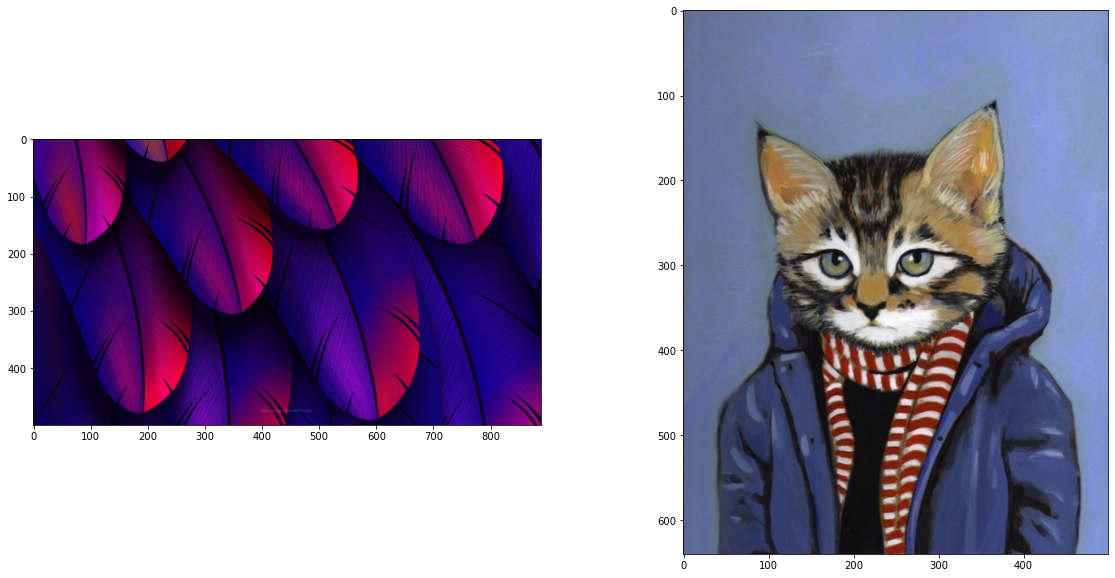

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.imshow(content_d)
ax2.imshow(style_d)

In [16]:
def get_features(image, model):
  layers = {
      '0' : 'conv1_1',
      '5' : 'conv2_1',
      '10' : 'conv3_1',
      '19' : 'conv4_1',
      '21' : 'conv4_2', # content_feature
      '28' : 'conv5_1'
  }
  x = image
  features = {}

  for name, layer in model._modules.items():
    x = layer(x)
    if name in layers:
      features[layers[name]] = x

  return features


In [18]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)

In [19]:
def gram_matrix(tensor):

  b, c, h, w = tensor.size() # Batch_size, Channel, Height, Width
  tensor = tensor.view(c, h * w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [20]:
style_grams = {layer : gram_matrix(style_f[layer]) for layer in style_f}

In [21]:
def content_loss(target_conv4_2, content_conv4_2):

  loss = torch.mean((target_conv4_2 - content_conv4_2) ** 2)
  return loss

In [22]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.75,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [23]:
def style_loss(style_weights, target_features, style_grams):

  loss = 0
  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b, c, h, w = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram) ** 2)
    loss += layer_loss / (c * h * w)

  return loss

In [25]:
target = content_p.clone().requires_grad_(True).cpu()
target_f = get_features(target, vgg)
print("Content Loss: ", content_loss(target_f['conv4_2'], content_f['conv4_2']))
print("Style Loss: ", style_loss(style_weights, target_f, style_grams))

Content Loss:  tensor(0., grad_fn=<MeanBackward0>)
Style Loss:  tensor(5858.7041, grad_fn=<AddBackward0>)


In [29]:
from torch import optim

optimizer = optim.Adam([target], lr=0.003)

alpha = 1
beta = 1e5

epochs = 3000
show_every = 10

In [27]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha * c_loss + beta * s_loss
  return loss

In [30]:
results = []
for i in range(epochs):
  target_f = get_features(target, vgg)
  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)
  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print("Total Loss at Epoch {} : {}".format(i, t_loss))
    results.append(deprocess(target.detach()))

Total Loss at Epoch 0 : 379620608.0
Total Loss at Epoch 10 : 327004320.0
Total Loss at Epoch 20 : 283346720.0
Total Loss at Epoch 30 : 246237280.0
Total Loss at Epoch 40 : 214703440.0
Total Loss at Epoch 50 : 187948656.0
Total Loss at Epoch 60 : 165227104.0
Total Loss at Epoch 70 : 145885152.0
Total Loss at Epoch 80 : 129367176.0
Total Loss at Epoch 90 : 115207360.0


KeyboardInterrupt: 

ValueError: num must be 1 <= num <= 6, not 7

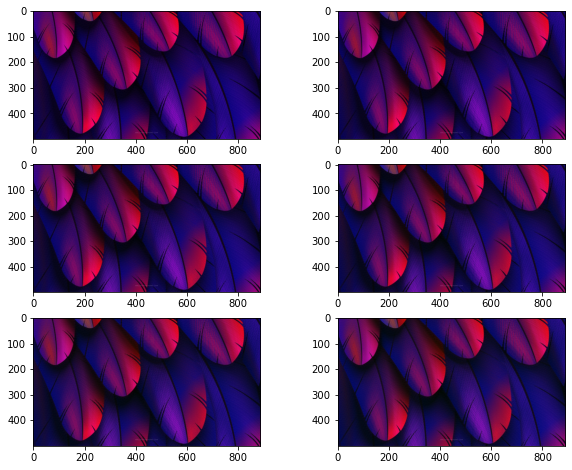

In [31]:
plt.figure(figsize = (10, 8))
for i in range(len(results)):
  plt.subplot(3, 2, i + 1)
  plt.imshow(results[i])
plt.show()

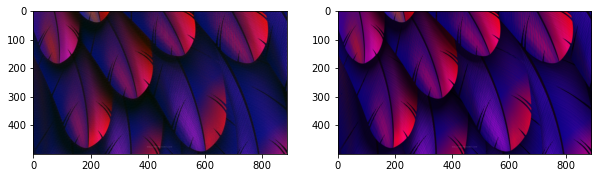

In [32]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)